# MVRegFus: Check completed runs
----------

Convenience notebook for inspecting MVRegFus run output, useful e.g. for checking registrations).

Indicate the run file used to create the output you want to inspect.

## Current functionality:
 - visualize the transformed views

In [27]:
import os,  sys, tempfile, shutil
import numpy as np
import h5py

from mvregfus import multiview
from mvregfus import mv_graph
from mvregfus import io_utils

In [21]:
run_file = '/Users/marvin/Documents/projects/mvregfus/bin/mvregfus_test_local.py'
sample = 0
ch = 0

with tempfile.TemporaryDirectory() as tmp_dir:
    shutil.copyfile(run_file, os.path.join(tmp_dir, 'config_for_checking_mvregfus_run.py'))
    sys.path = [tmp_dir] + sys.path
    
    from config_for_checking_mvregfus_run import out_dir, graph

views = [iview for iview in range(100) if mv_graph.transformed_view_label %(0, sample, iview, ch) in graph]

In [33]:
res_level = 1
ts = []
for iview in views:
    fn = os.path.join(out_dir, mv_graph.transformed_view_label %(0, 0, iview, ch))
    tmp = h5py.File(fn, mode='r')['DataSet/ResolutionLevel %s/TimePoint 0/Channel 0/Data' %res_level][()]
    ts.append(tmp)

<IPython.core.display.Javascript object>


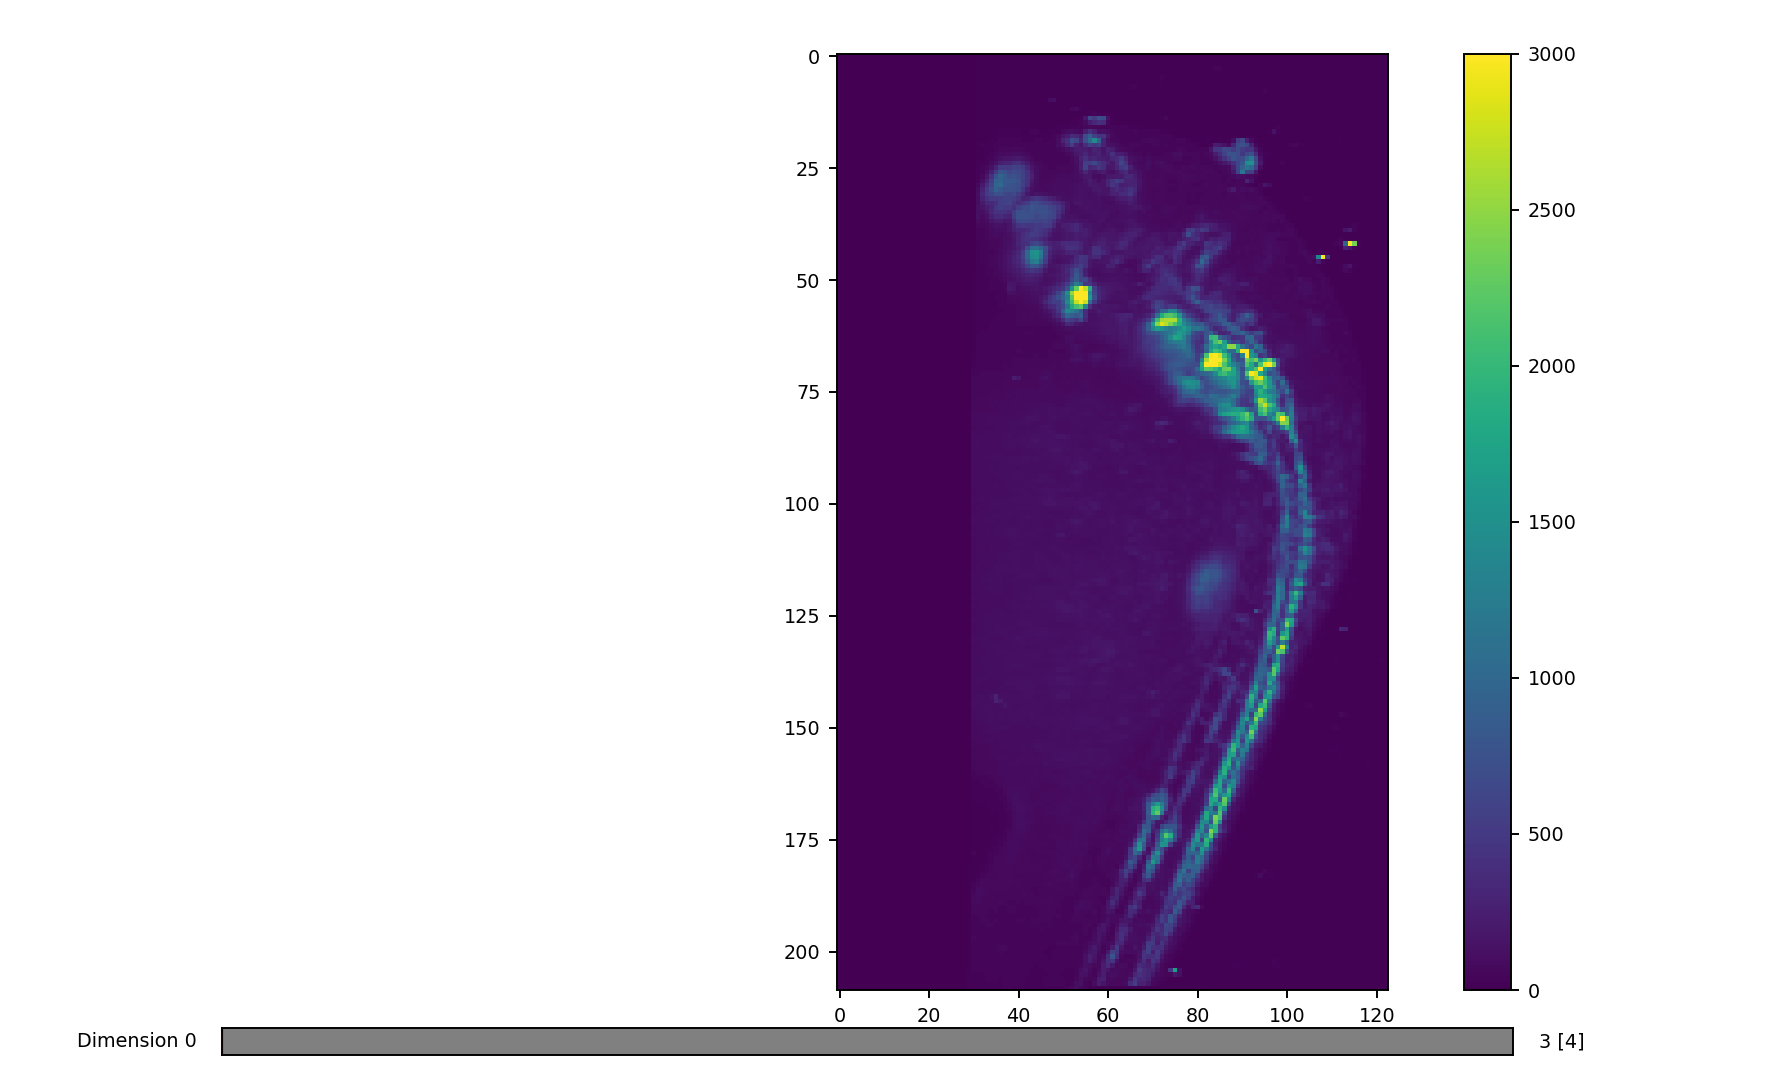

(<Figure size 988.8x604.8 with 3 Axes>,
 <matplotlib.image.AxesImage at 0x10312a0310>)

In [34]:
%matplotlib notebook
import tifffile
# tifffile.imshow(np.array(ts))
tifffile.imshow(np.array([t.max(-3) for t in ts]), photometric='l', vmin=0, vmax=3000)